In [1]:
# Constants
TRAIN_FRACTION = 0.7
RANDOM_SEED = 86720

In [2]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv(r"..\..\data\diabetes\diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
train_data = df.sample(frac=TRAIN_FRACTION,random_state=RANDOM_SEED)

In [7]:
train_index = list(train_data.index)

In [8]:
test_data = df.drop(train_index)

In [9]:
test_index = list(test_data.index)

In [10]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [11]:
x_test = test_data[features]

In [12]:
y_test = test_data['Outcome']

In [13]:
x_train = train_data[features]
y_train = train_data['Outcome']

In [14]:
print(f"Number of diabetic patients in training - {sum(y_train)}")
print(f"Number of non-diabetic patients in training - {sum(1-(y_train))}")

Number of diabetic patients in training - 202
Number of non-diabetic patients in training - 336


In [15]:
print(f"Number of diabetic patients in test - {sum(y_test)}")
print(f"Number of non-diabetic patients in test - {sum(1-(y_test))}")

Number of diabetic patients in test - 66
Number of non-diabetic patients in test - 164


In [16]:
x_test.shape

(230, 8)

#### Entropy Metric - Best Split

In [17]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=1)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

[Text(0.5, 0.75, 'Glucose <= 123.5\nentropy = 0.955\nsamples = 538\nvalue = [336, 202]'),
 Text(0.25, 0.25, 'entropy = 0.721\nsamples = 301\nvalue = [241, 60]'),
 Text(0.75, 0.25, 'entropy = 0.971\nsamples = 237\nvalue = [95, 142]')]

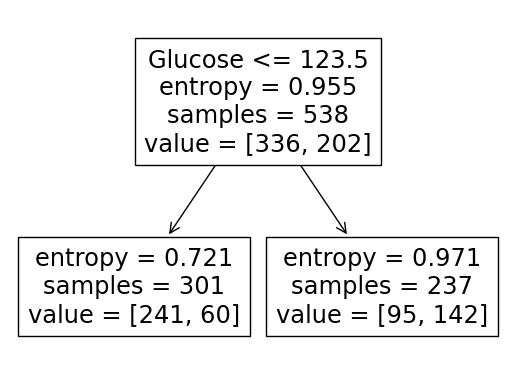

In [18]:
tree.plot_tree(dtree,feature_names=features)

#### Gini Metric - Best Split

In [19]:
dtree = DecisionTreeClassifier(criterion="gini",max_depth=1)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'Glucose <= 123.5\ngini = 0.469\nsamples = 538\nvalue = [336, 202]'),
 Text(0.25, 0.25, 'gini = 0.319\nsamples = 301\nvalue = [241, 60]'),
 Text(0.75, 0.25, 'gini = 0.48\nsamples = 237\nvalue = [95, 142]')]

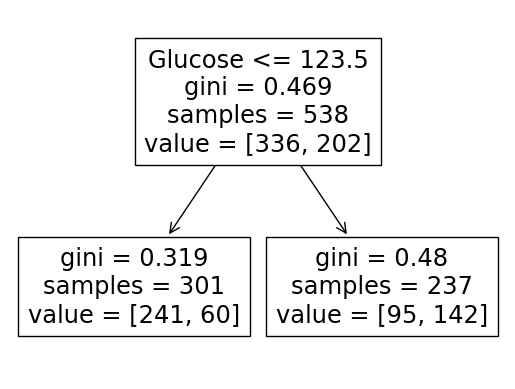

In [20]:
tree.plot_tree(dtree,feature_names=features)

#### Entropy Metric - Random Split

In [21]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=1,splitter="random")
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, splitter='random')

[Text(0.5, 0.75, 'BMI <= 29.53\nentropy = 0.955\nsamples = 538\nvalue = [336, 202]'),
 Text(0.25, 0.25, 'entropy = 0.652\nsamples = 191\nvalue = [159, 32]'),
 Text(0.75, 0.25, 'entropy = 1.0\nsamples = 347\nvalue = [177, 170]')]

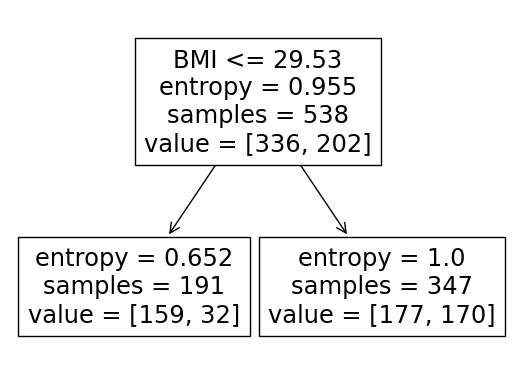

In [22]:
tree.plot_tree(dtree,feature_names=features)

#### Gini Metric - Random Split

In [23]:
dtree = DecisionTreeClassifier(criterion="gini",max_depth=1,splitter="random")
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1, splitter='random')

[Text(0.5, 0.75, 'Glucose <= 120.628\ngini = 0.469\nsamples = 538\nvalue = [336, 202]'),
 Text(0.25, 0.25, 'gini = 0.316\nsamples = 280\nvalue = [225, 55]'),
 Text(0.75, 0.25, 'gini = 0.49\nsamples = 258\nvalue = [111, 147]')]

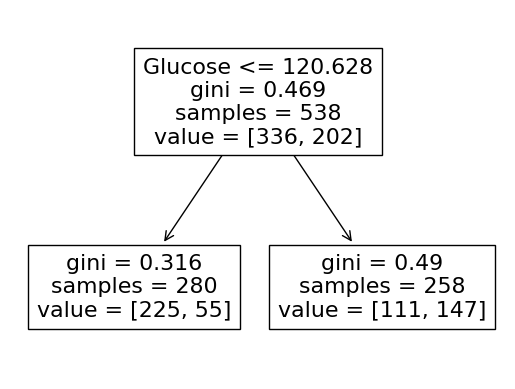

In [24]:
tree.plot_tree(dtree,feature_names=features)